### CSE - 221710305031 - M.SHREYA REDDY

### CLASSIFICATION OF LIVER DISEASES

### About the Dataset :
Content :
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

- Age of the patient
- Gender of the patient
- Total Bilirubin
- Direct Bilirubin
- Alkaline Phosphotase
- Alamine Aminotransferase
- Aspartate Aminotransferase
- Total Protiens
- Albumin
- Albumin and Globulin Ratio
- Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

#### In this project, we are going to use the Indian Liver Patient Records dataset from kaggle.
#### To predict whether a patient has liver disease or not based on certain features.
#### To check with the total proteins,albumin etc whether it is asscoiated with disease or not.

### IMPORTING THE LIBRARIES

In [425]:
#Importing the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### READING THE DATA-SET

In [426]:
#Reading the data

patients = pd.read_csv(r"C:\Users\Shreya Reddy\Desktop\DATA SCIENCE WITH PYTHON\LiverDiseases.csv")
patients.head(2)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1

In [427]:
pwd

'C:\\Users\\Shreya Reddy\\Desktop\\DATA SCIENCE WITH PYTHON'

### TO CHECK THE VERSION OF THE PACKAGES IMPORTED

In [511]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(sklearn.__version__)

1.0.1
1.18.1
0.10.0
0.22.1


### Missing values

In [428]:
#Checking for the null or missing values in data

patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

#### Since Albumin_and_Globulin_Ratio contains 4 null values,they either can be discarded or filled with suitable values. I am going to fill the values with mean of the column.

In [429]:
patients['Albumin_and_Globulin_Ratio'].fillna(patients['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [430]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [431]:
patients.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

### Statistical Analysis


In [432]:
patients.describe(include='all')

Age Gender  Total_Bilirubin  Direct_Bilirubin  \
count   583.000000    583       583.000000        583.000000   
unique         NaN      2              NaN               NaN   
top            NaN   Male              NaN               NaN   
freq           NaN    441              NaN               NaN   
mean     44.746141    NaN         3.298799          1.486106   
std      16.189833    NaN         6.209522          2.808498   
min       4.000000    NaN         0.400000          0.100000   
25%      33.000000    NaN         0.800000          0.200000   
50%      45.000000    NaN         1.000000          0.300000   
75%      58.000000    NaN         2.600000          1.300000   
max      90.000000    NaN        75.000000         19.700000   

        Alkaline_Phosphotase  Alamine_Aminotransferase  \
count             583.000000                583.000000   
unique                   NaN                       NaN   
top                      NaN                       NaN   
freq                     NaN                       NaN   
mean              290.576329                 80.713551   
std               242.937989                182.620356   
min                63.000000                 10.000000   
25%               175.500000                 23.000000   
50%               208.000000                 35.000000   
75%               298.000000                 60.500000   
max              2110.000000               2000.000000   

        Aspartate_Aminotransferase  Total_Protiens     Albumin  \
count                   583.000000      583.000000  583.000000   
unique                         NaN             NaN         NaN   
top                            NaN             NaN         NaN   
freq                           NaN             NaN         NaN   
mean                    109.910806        6.483190    3.141852   
std                     288.918529        1.085451    0.795519   
min                      10.000000        2.700000    0.900000   
25%                      25.000000        5.800000    2.600000   
50%                      42.000000        6.600000    3.100000   
75%                      87.000000        7.200000    3.800000   
max                    4929.000000        9.600000    5.500000   

        Albumin_and_Globulin_Ratio     Dataset  
count                   583.000000  583.000000  
unique                         NaN         NaN  
top                            NaN         NaN  
freq                           NaN         NaN  
mean                      0.947064    1.286449  
std                       0.318492    0.452490  
min                       0.300000    1.000000  
25%                       0.700000    1.000000  
50%                       0.947064    1.000000  
75%                       1.100000    2.000000  
max                       2.800000    2.000000

In [433]:
patients.shape

(583, 11)

- So there are 583 rows and 11 columns in our dataset.

In [434]:
patients.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [435]:
patients.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [436]:
patients.describe(include=['object'])

Gender
count     583
unique      2
top      Male
freq      441

In [437]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Here is the observation from the dataset:
- Only gender is non-numeric veriable. All others are numeric.
- There are 10 features and 1 output - dataset column. Value 1 indicates that the patient has liver disease and 0 indicates the patient does not have liver disease.

In [438]:
patients.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

### Data Visualization 

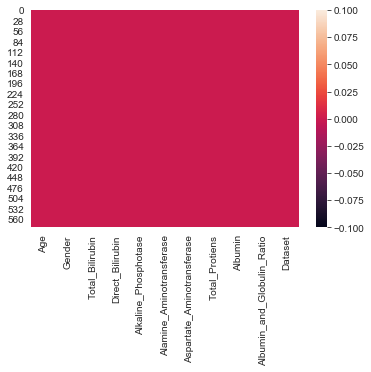

In [439]:
#Visualizing the missing values with heatmap
sns.heatmap(patients.isna())

### missingno---> It is specially used for checking(visualizing) the missing values

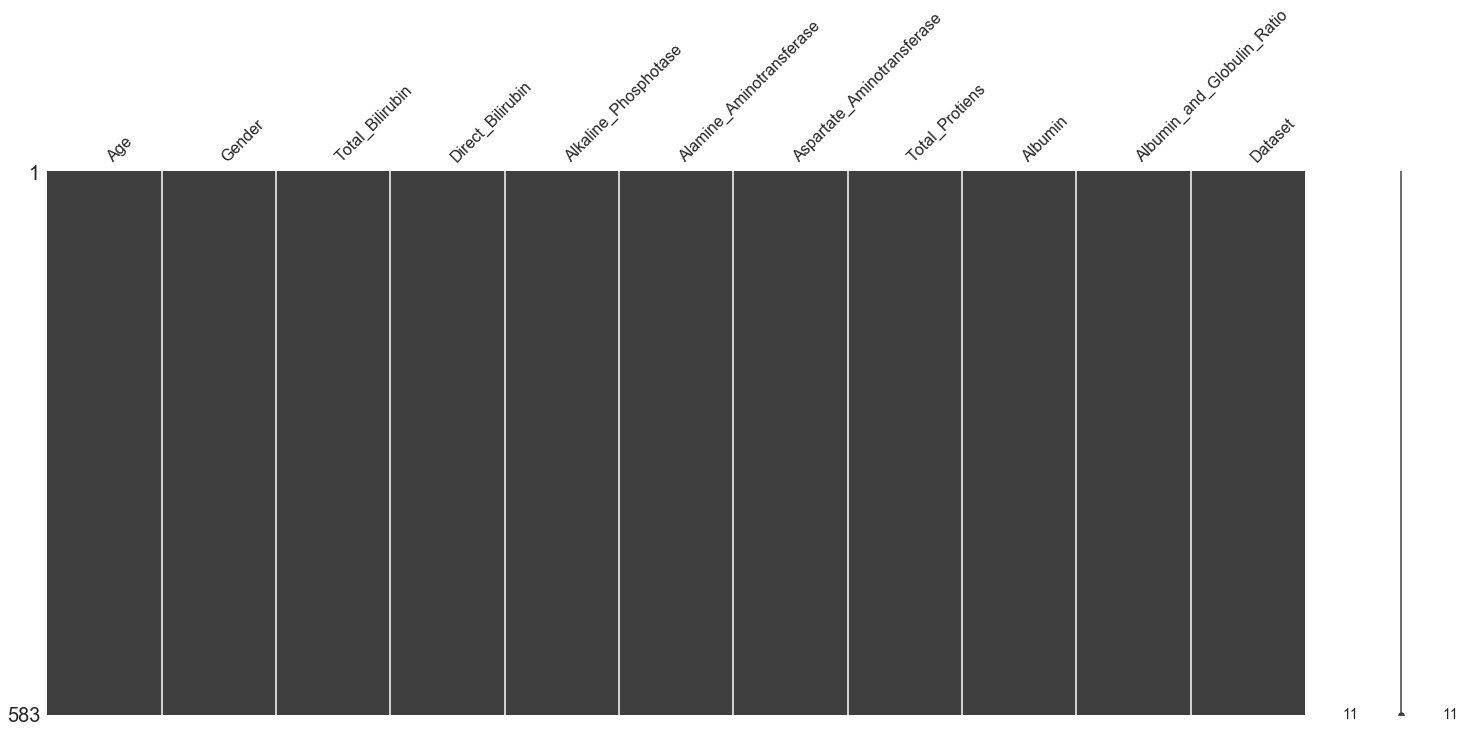

In [440]:
import missingno as msno
msno.matrix(patients)

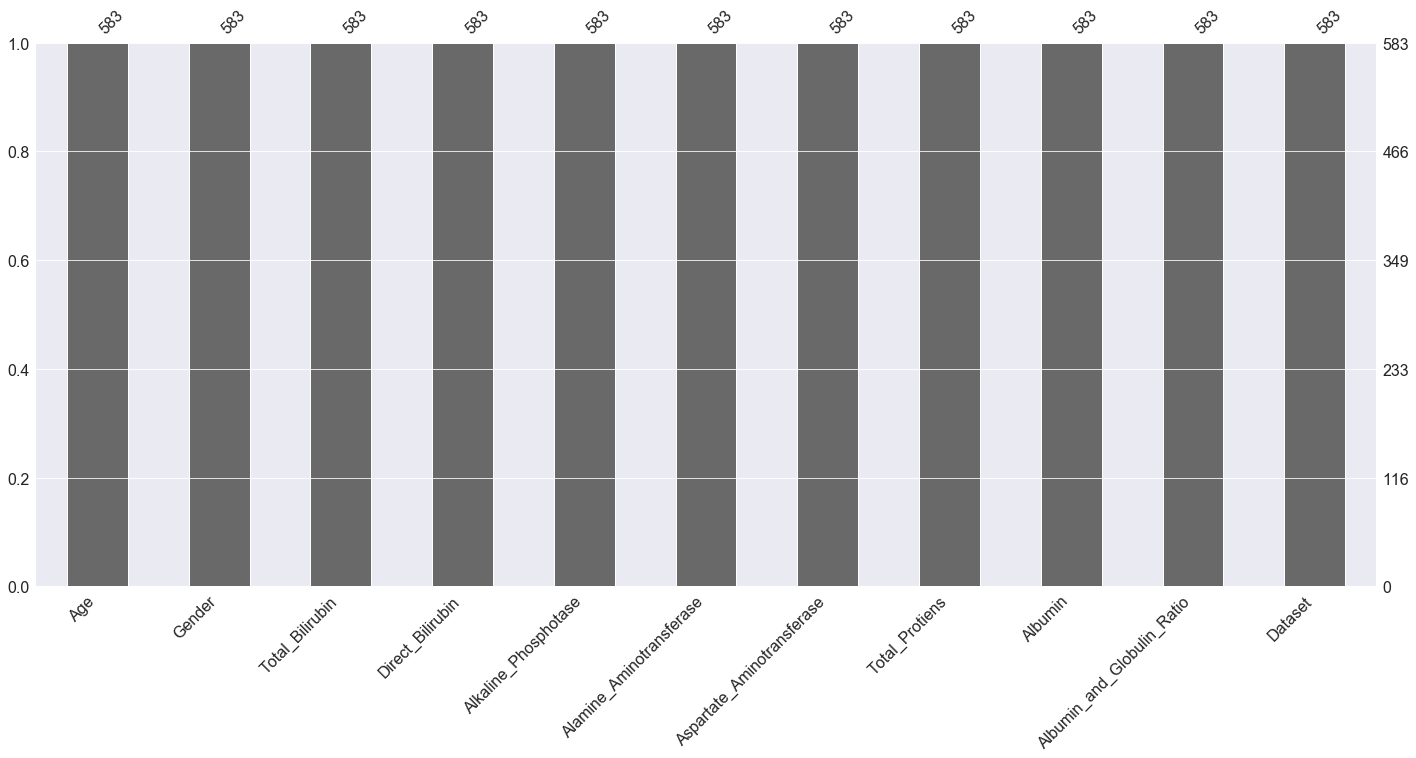

In [441]:
msno.bar(patients)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018A99B78EC8>,
      dtype=object)

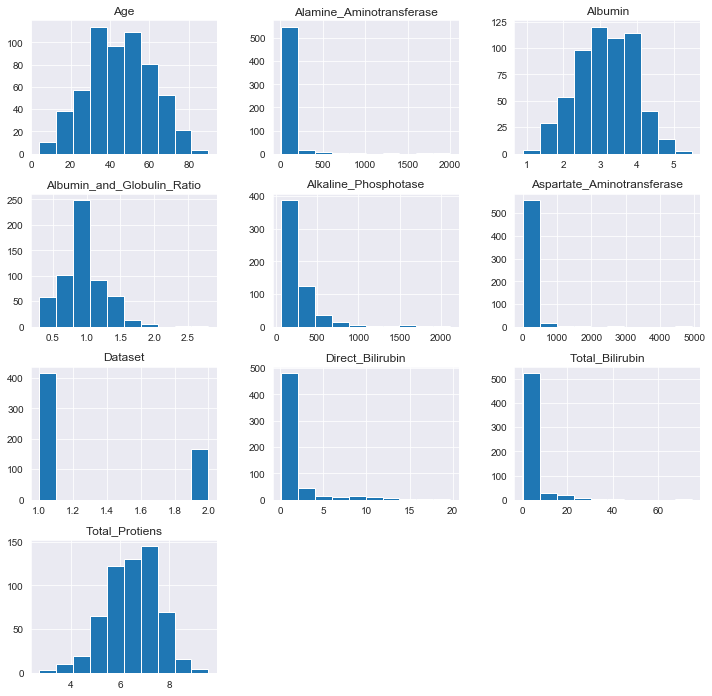

In [442]:
patients.hist(figsize=(12,12)) 

### To check the countplot of our Dataset column :

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


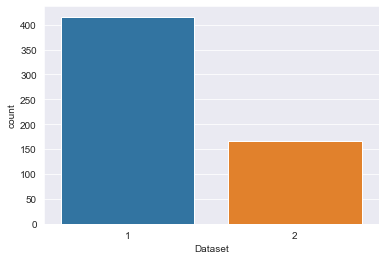

In [443]:
sns.countplot(data=patients, x = 'Dataset', label='Count')

LD, NLD = patients['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

### To check the countplot of gender column :

Number of patients that are male:  441
Number of patients that are female:  142


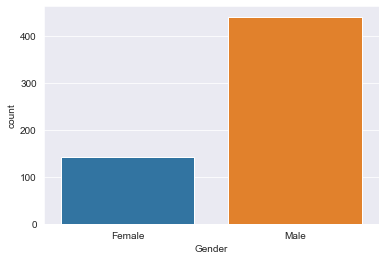

In [444]:
sns.countplot(data=patients, x = 'Gender', label='Count')

M, F = patients['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

#### Observation :
- From the above graph, we can see that Number of males are more than the Number of females.

### To check the age group of patients :

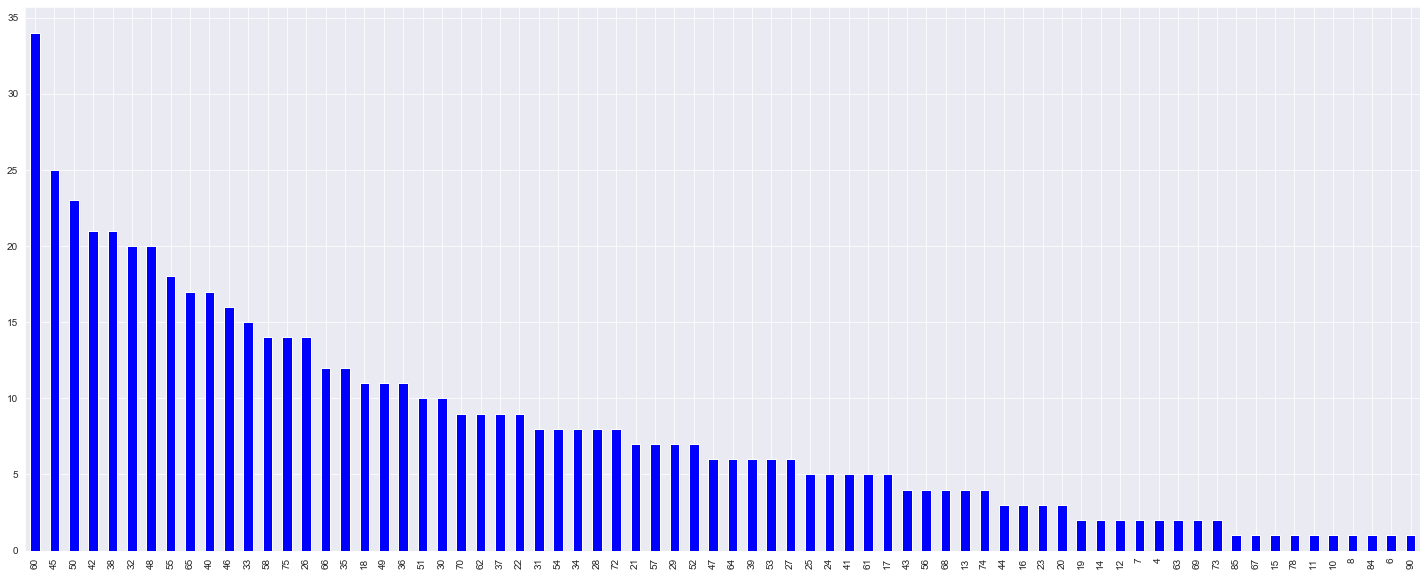

In [445]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
patients['Age'].value_counts().plot.bar(color='blue')

### To view the pairplot of patients based on Gender :

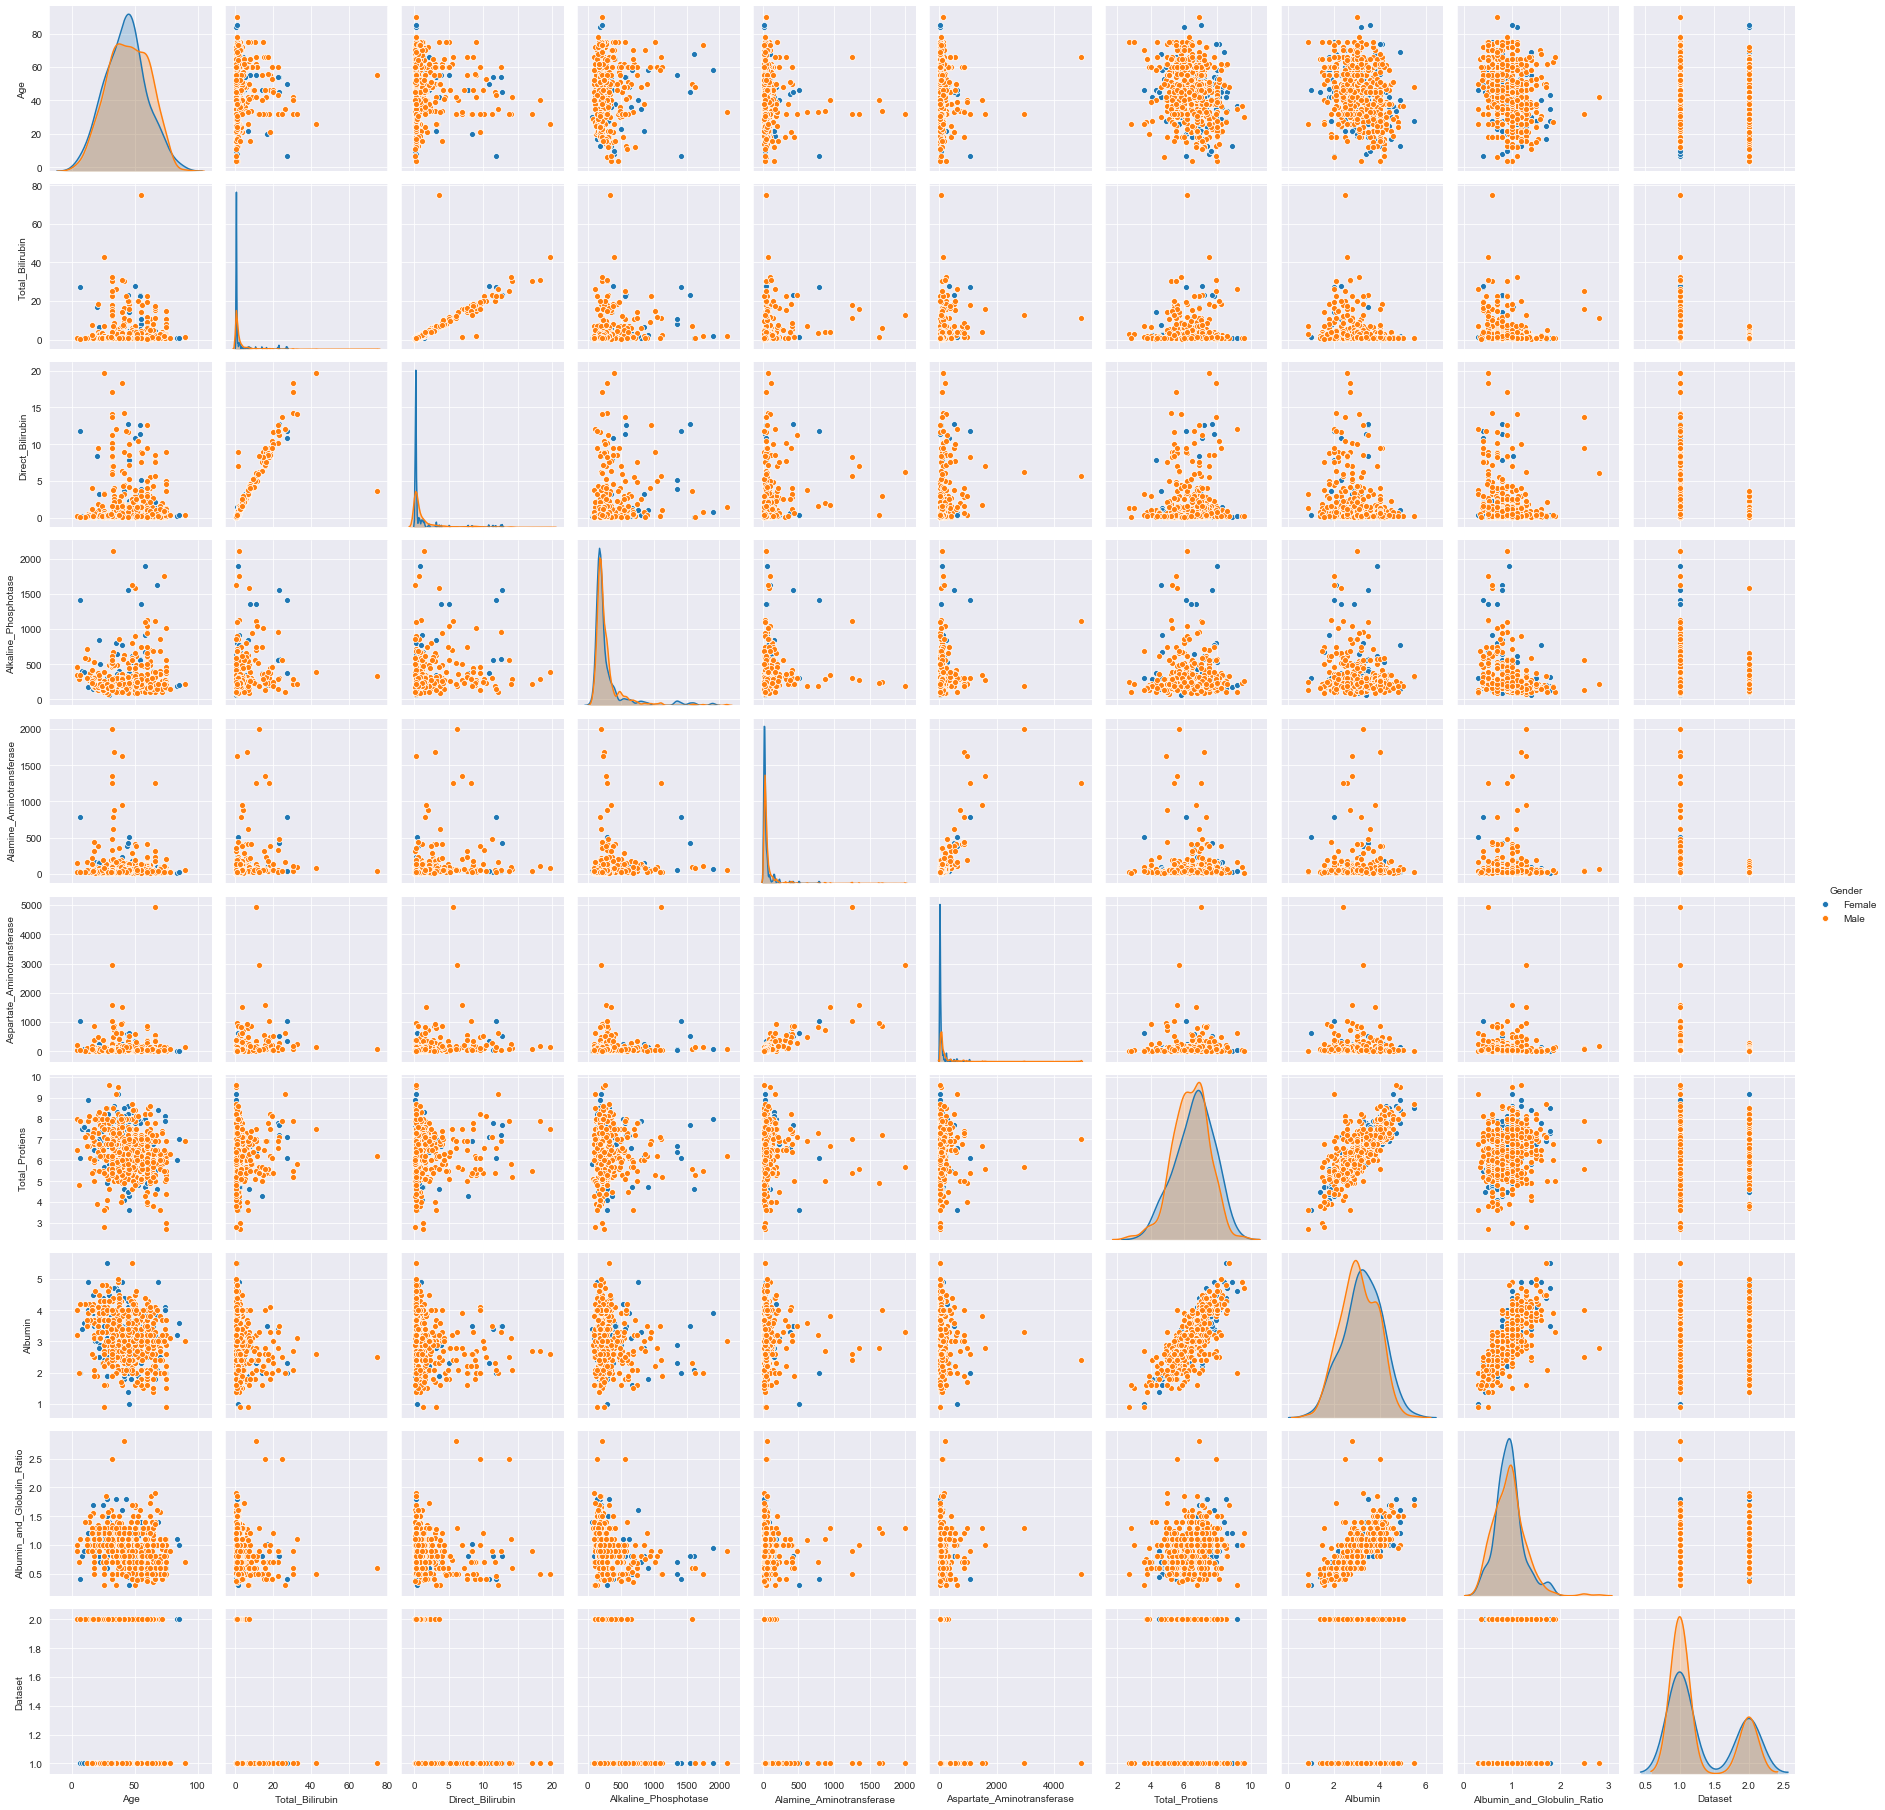

In [446]:
import seaborn as sns
sns.pairplot(patients,hue='Gender')

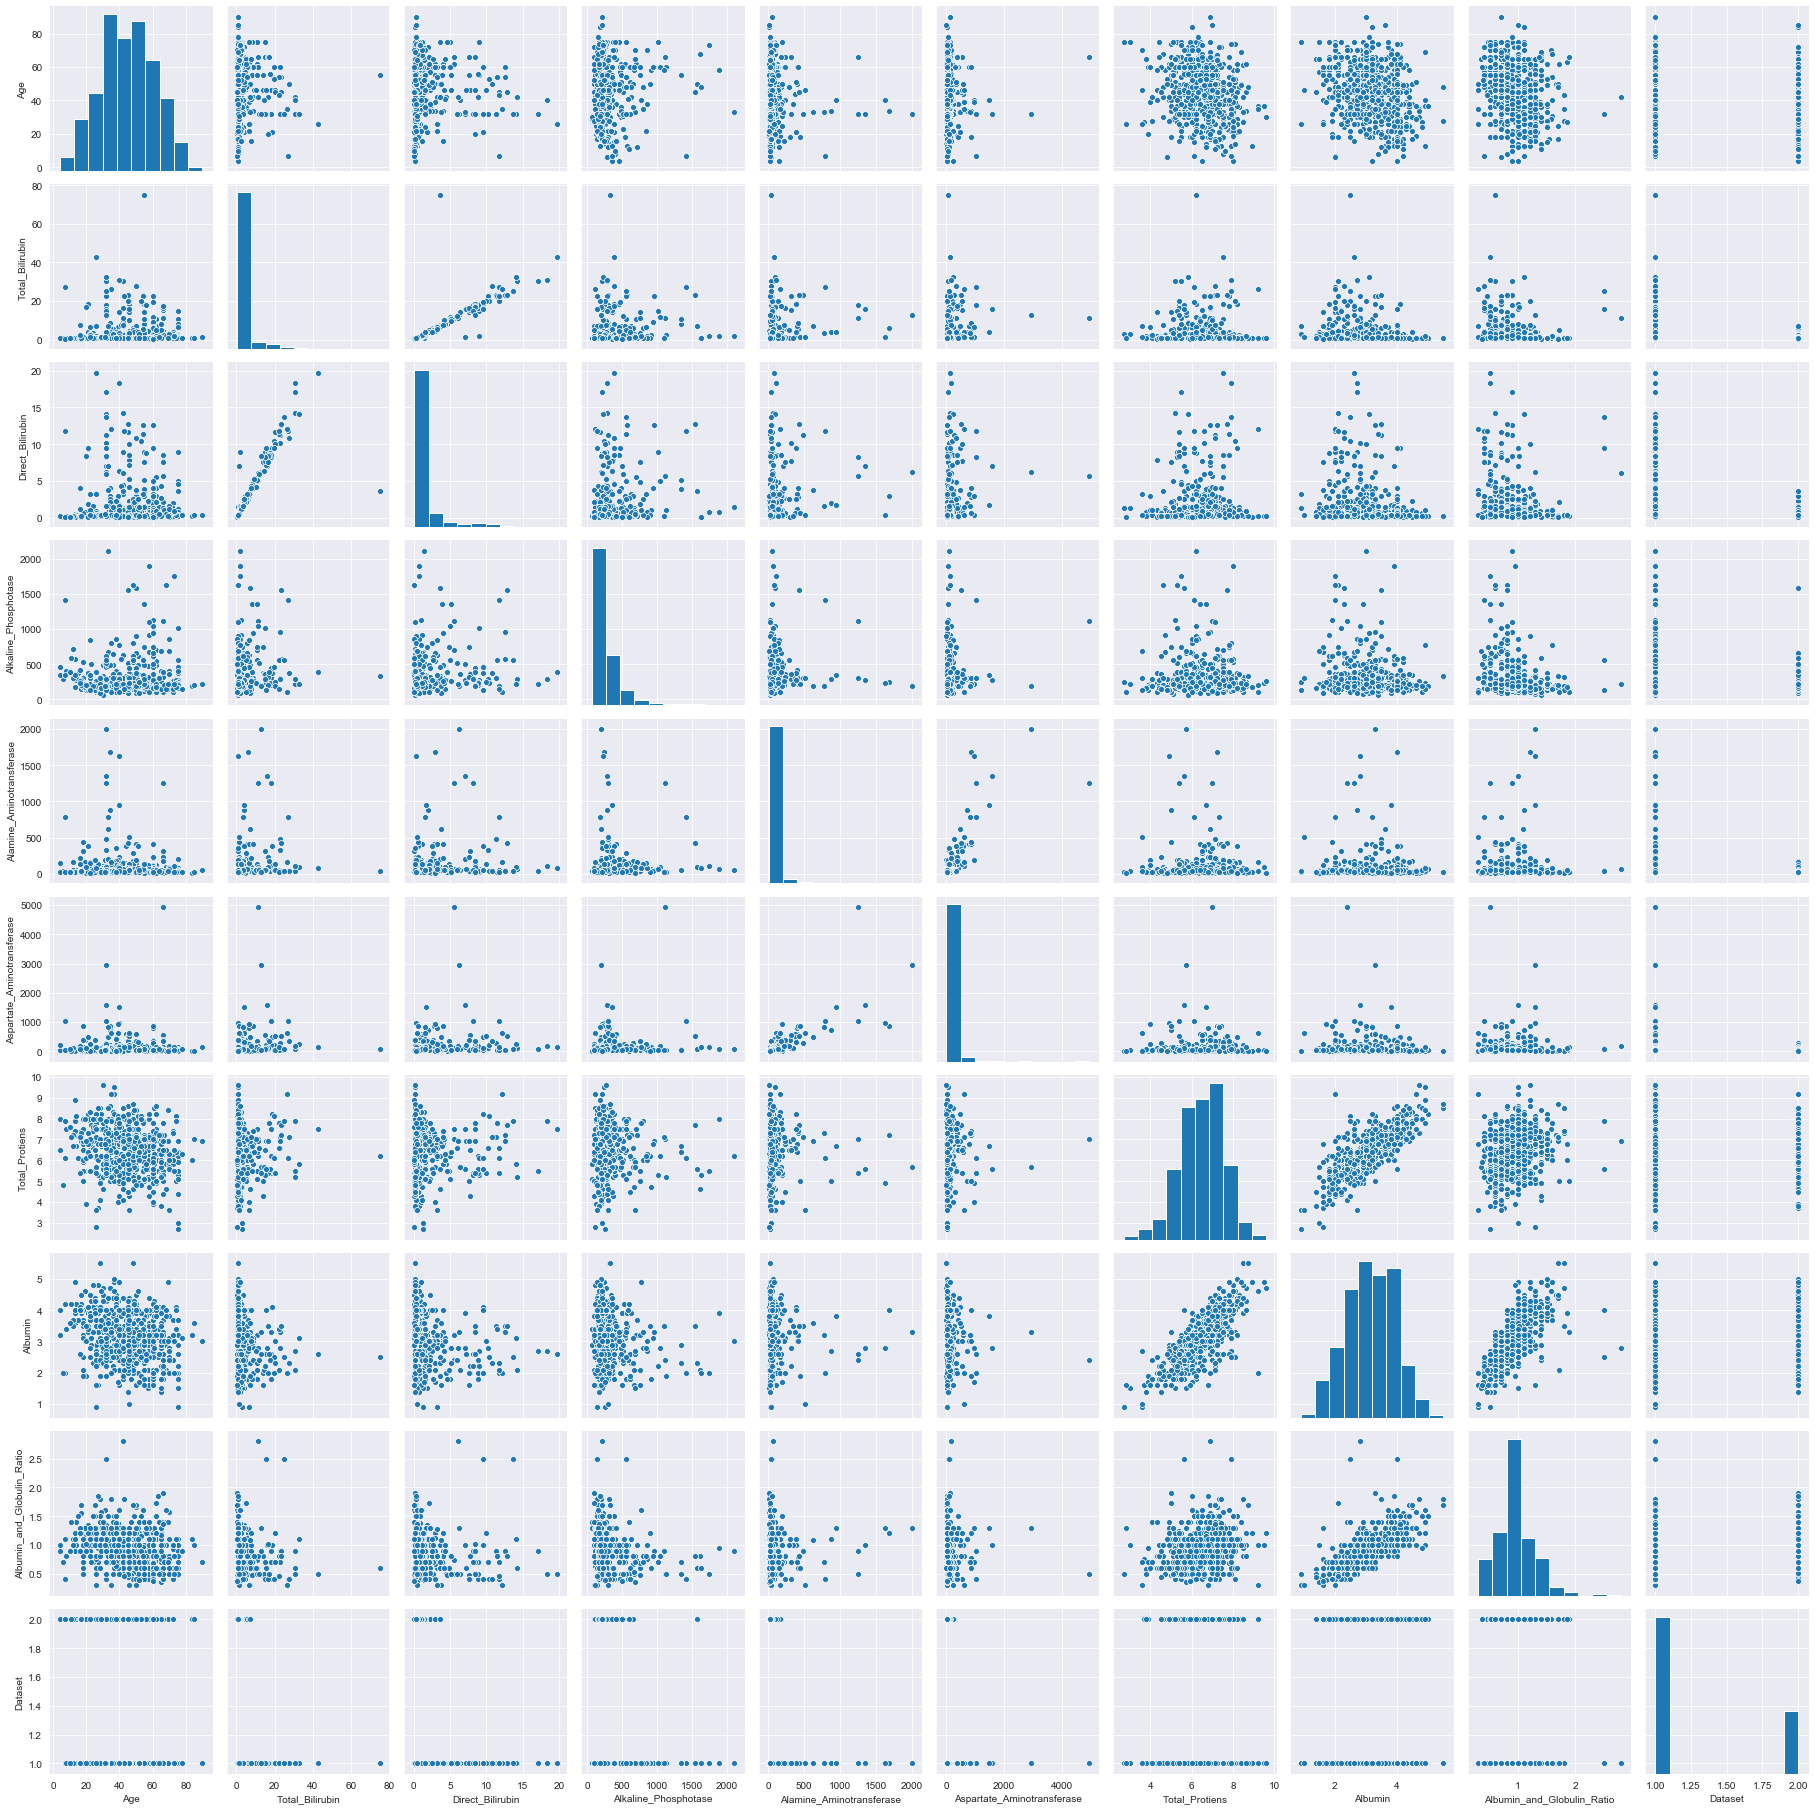

In [447]:
sns.pairplot(patients)

### To compare the Gender based on the Protein Intake :

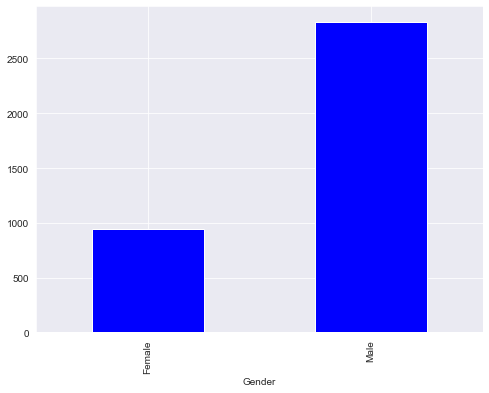

In [448]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='blue')

### Observations :
- Protein intake is higher in the case of male and comparitively less in females.

### To compare the Gender column based on Albumin Level :

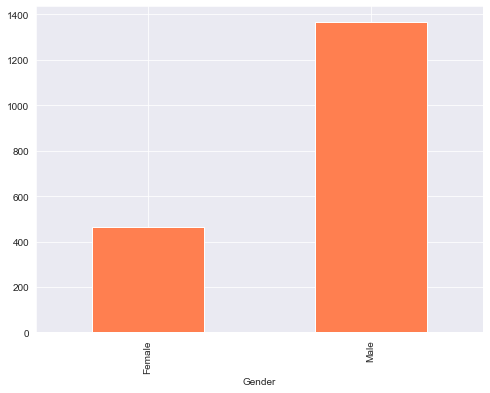

In [449]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Albumin'].plot.bar(color='coral')

### Observation :
- Albumin Level is higher in the case in the case of male compared to female.

### To compare the Gender column based on the Bilirubin content :

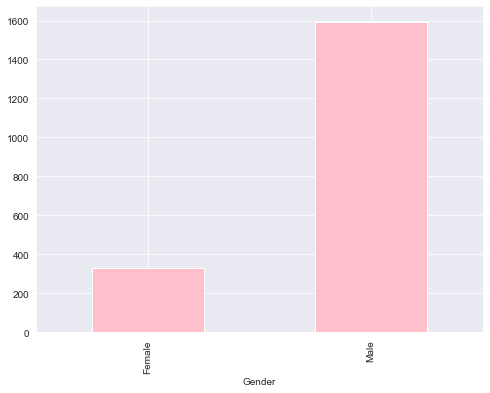

In [450]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='pink')

### Observations :
- It is clearly seen that males have more bilirubin content compared to females.
- Higher the Bilirubin content, higher the case is prone to Liver disease.

### To compare the albumin and albumin and globulin ratio by a scatterplot.

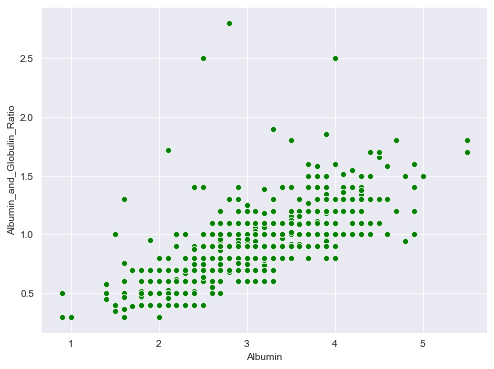

In [451]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='green',data=patients);
plt.show()

### To check the correlation between the features using a heatmap :

In [452]:
corr=patients.corr()

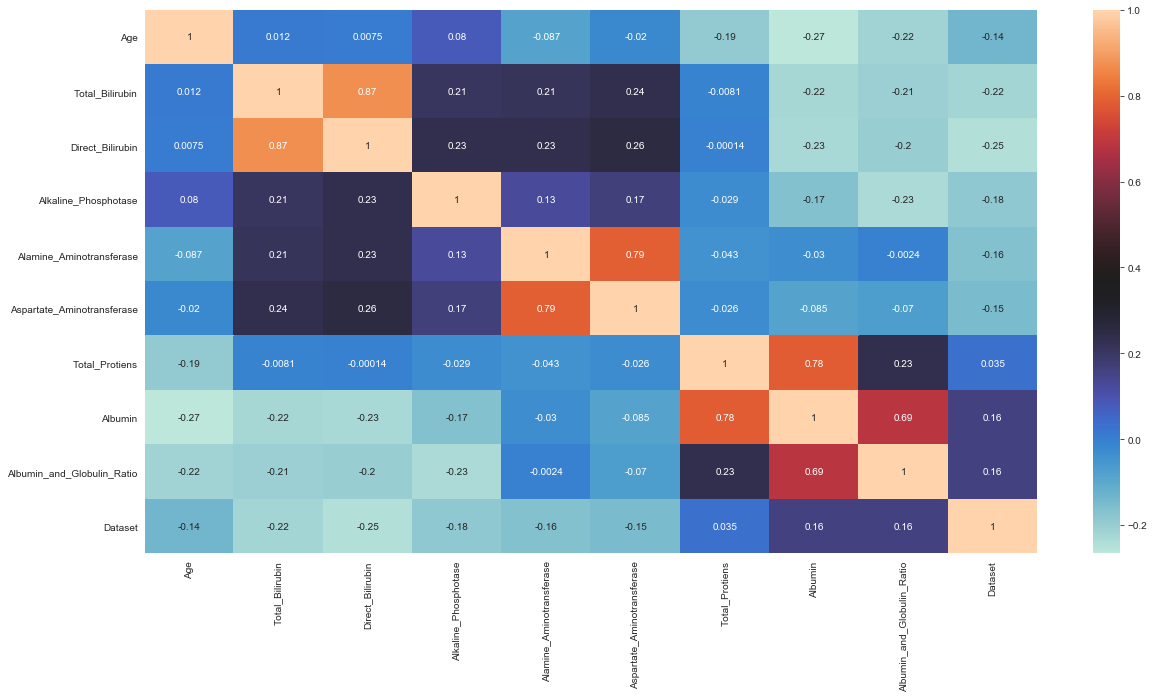

In [453]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="icefire",annot=True)

- The above correlation also indicates the following correlation : <br>
- Total_Protiens & Albumin <br>
- Alamine_Aminotransferase & Aspartate_Aminotransferase <br>
- Direct_Bilirubin & Total_Bilirubin <br>
- There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin <br>

### To convert the categorical column(Gender) into numerical format :

In [454]:
patients['Gender']=patients['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [455]:
patients.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

### Building the model :
### Inorder to build a successful model we have to train and test the model.

In [456]:
patients.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

### Define  X and y.
### X is our features and y is our target.

In [457]:
X=patients[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']]
y=patients['Dataset']

In [458]:
## Split the data into training and testing
## Build the model on training and check the model performance on test data
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [459]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(408, 10)
(408,)
(175, 10)
(175,)


In [460]:
# Training Data
# Build the classifier on training data and check the model performance on test data
# Sklearn library : import, instantiate, fit
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\Shreya Reddy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [461]:
# To make predictions using the model
# To perform prediction using the test dataset
y_pred = log_reg.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [462]:
# To display the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test,y_pred)
conf

array([[116,   9],
       [ 41,   9]], dtype=int64)

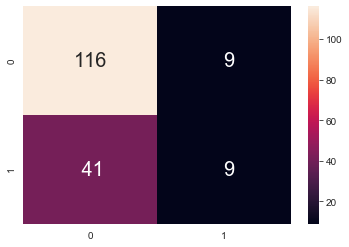

In [463]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [464]:
print('true_negative =', conf[0][0])
print('false_positive =', conf[0][1])
print('false_negative =', conf[1][0])
print('true_positive =', conf[1][1])

true_negative = 116
false_positive = 9
false_negative = 41
true_positive = 9


0 ---> Indicates patient doesnot have liver disease<br>
1 ---> Indicates patient has liver disease<br>

In [465]:
## Accuracy --->  TP+TN/TP+FP+TN+FN
## Correct Predictions/ Total Number of Predictions
(9+116)/(9+9+116+41)

0.7142857142857143

In [466]:
accuracy_score(y_test,y_pred)

0.7142857142857143

In [467]:
true_negative = conf[0][0]
false_positive = conf[0][1]
false_negative = conf[1][0]
true_positive = conf[1][1]

In [468]:
# Precision 
# Syntax: precision_score(actualValues, predictedValues)
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred)

0.7388535031847133

In [469]:
# Recall calculated by using a function
recall_score(y_test, y_pred)

0.928

In [470]:
# Calculation of f1-score for the model
from sklearn.metrics import f1_score
f1_score(y_test, y_pred) # f1_score(Actual Values, Predicted Values)

0.822695035460993

In [471]:
## Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.93      0.82       125
           2       0.50      0.18      0.26        50

    accuracy                           0.71       175
   macro avg       0.62      0.55      0.54       175
weighted avg       0.67      0.71      0.66       175



### K-Nearest Neighbors Algorithm : 

In [472]:
X = patients.drop(columns=['Dataset'])
#check that the target variable has been removed
X.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  
0      3.3                        0.90  
1      3.2                        0.74  
2      3.3                        0.89  
3      3.4                        1.00  
4      2.4                        0.40

In [473]:
#separate target values
y = patients['Dataset'].values
#view target values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [474]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [475]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [476]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [477]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.6239316239316239

In [478]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.66666667 0.64957265 0.63247863 0.57758621 0.72413793]
cv_scores mean:0.6500884173297966


In [479]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': [3,5,9,11,19,21,23,25,31,33,35,37,39,41,43,45,47,49] }
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 9, 11, 19, 21, 23, 25, 31, 33,
                                         35, 37, 39, 41, 43, 45, 47, 49]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [502]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 45}

In [503]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7169466548776894

### By using grid search to find the optimal parameter for our model, we have improved our model accuracy by over 6% 

### Random Forest Classifier :

In [491]:
from sklearn.ensemble import RandomForestClassifier 

In [492]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [495]:
# predicting X_test
y_pred = model_rfc.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2],
      dtype=int64)

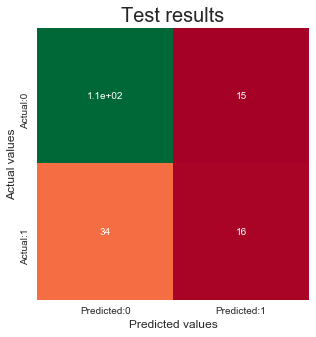

         Predicted:0 Predicted:1
Actual:0          TN          FP
Actual:1          FN          TP


In [497]:
# confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# plotting test results confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, cmap="RdYlGn", annot=True, cbar=False, square=True)
plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.title("Test results", fontsize=20)
plt.show()

cm_reference = pd.DataFrame(np.array(["TN","FP","FN","TP"]).reshape(2,2), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
print(cm_reference)

In [498]:
# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)

True positives: 16
True negatives: 110
False positives (Type I error): 15
False negatives (Type II error): 34


In [501]:
rfc_accuracy = accuracy_score(y_test, y_pred)
print('Random Forest Classifier Accuracy: {:.2f}%'.format(rfc_accuracy*100))

Random Forest Classifier Accuracy: 72.00%
